In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import os
import pathlib
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile

In [2]:
root_path = "C:/Users/abedi/OneDrive/Desktop/CNN/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification"

In [3]:
os.listdir(root_path)

['test', 'train', 'val']

In [4]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [5]:
os.listdir(root_path + "/train")

['fractured', 'not fractured']

In [6]:
num_fractured_bone_images = len(os.listdir(root_path + "/" + "train/fractured"))
num_not_fractured_bone_images = len(os.listdir(root_path + "/" + "train/not fractured"))
num_fractured_bone_images, num_not_fractured_bone_images

(4606, 4640)

In [7]:
# get class names
data_dir = pathlib.Path(root_path + "/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['fractured' 'not fractured']


In [8]:
def random_img(dirpath, target_class):
    directory = dirpath + "/" + target_class
    random_img = random.sample(os.listdir(directory) , 1)

    img = mpimg.imread(directory + "/" + random_img[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}")

    return img

Image shape: (224, 224, 3)


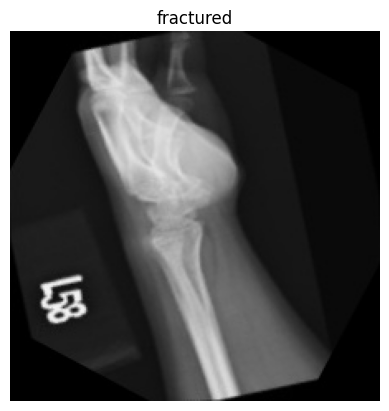

In [9]:
img = random_img(root_path + "/train", class_names[0])

In [10]:
# data

In [11]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
train_dir = root_path + "/train"
test_dir = root_path + "/test"
val_dir = root_path + "/val"

In [13]:
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary")
test_data = train_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary")
val_data = train_datagen.flow_from_directory(val_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary")

Found 9246 images belonging to 2 classes.
Found 506 images belonging to 2 classes.
Found 829 images belonging to 2 classes.


In [14]:
# MODEL

In [15]:
baseline_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')                        
])

baseline_model.compile(loss='binary_crossentropy',
                       optimizer=tf.keras.optimizers.Adam(),
                       metrics=['accuracy'])

baseline_model_loss = baseline_model.fit(train_data,
                                         epochs=5,
                                         steps_per_epoch=len(train_data),
                                         validation_data=val_data,
                                         validation_steps=len(val_data))

c:\Users\abedi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\abedi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - accuracy: 0.7488 - loss: 0.4753

c:\Users\abedi\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


289/289 ━━━━━━━━━━━━━━━━━━━━ 69s 226ms/step - accuracy: 0.7492 - loss: 0.4748 - val_accuracy: 0.8758 - val_loss: 0.3772
Epoch 2/5
289/289 ━━━━━━━━━━━━━━━━━━━━ 45s 155ms/step - accuracy: 0.9646 - loss: 0.1143 - val_accuracy: 0.9324 - val_loss: 0.2206
Epoch 3/5
289/289 ━━━━━━━━━━━━━━━━━━━━ 49s 170ms/step - accuracy: 0.9864 - loss: 0.0474 - val_accuracy: 0.9385 - val_loss: 0.2043
Epoch 4/5
289/289 ━━━━━━━━━━━━━━━━━━━━ 61s 209ms/step - accuracy: 0.9933 - loss: 0.0260 - val_accuracy: 0.9614 - val_loss: 0.1206
Epoch 5/5
289/289 ━━━━━━━━━━━━━━━━━━━━ 53s 182ms/step - accuracy: 0.9987 - loss: 0.0085 - val_accuracy: 0.9723 - val_loss: 0.1095


In [16]:
baseline_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

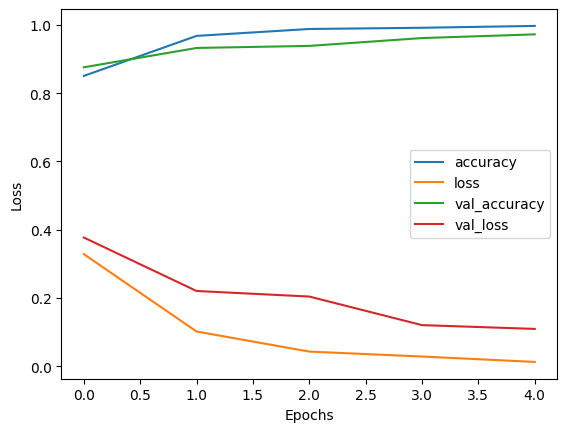

In [17]:
pd.DataFrame(baseline_model_loss.history).plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

Data Augmentation

In [18]:
train_datagen_ag = ImageDataGenerator(rescale=1./255,
                                      rotation_range=20,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [19]:
train_data_ag = train_datagen_ag.flow_from_directory(train_dir,
                                                     batch_size=32,
                                                     target_size=(224,224),
                                                     class_mode="binary",
                                                     shuffle=True)

test_data = test_datagen.flow_from_directory(test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary")
val_data = test_datagen.flow_from_directory(val_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary")

Found 9246 images belonging to 2 classes.
Found 506 images belonging to 2 classes.
Found 829 images belonging to 2 classes.


In [20]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10,3,activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_1_loss = model_1.fit(train_data_ag,
                           epochs=5,
                           steps_per_epoch=len(train_data_ag),
                           validation_data=val_data,
                           validation_steps=len(val_data))

c:\Users\abedi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\abedi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step - accuracy: 0.5973 - loss: 0.6491

c:\Users\abedi\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


289/289 ━━━━━━━━━━━━━━━━━━━━ 109s 366ms/step - accuracy: 0.5976 - loss: 0.6489 - val_accuracy: 0.8010 - val_loss: 0.4737
Epoch 2/5
289/289 ━━━━━━━━━━━━━━━━━━━━ 104s 358ms/step - accuracy: 0.7744 - loss: 0.4691 - val_accuracy: 0.8480 - val_loss: 0.4277
Epoch 3/5
289/289 ━━━━━━━━━━━━━━━━━━━━ 104s 358ms/step - accuracy: 0.8351 - loss: 0.3881 - val_accuracy: 0.8456 - val_loss: 0.3899
Epoch 4/5
289/289 ━━━━━━━━━━━━━━━━━━━━ 108s 372ms/step - accuracy: 0.8657 - loss: 0.3282 - val_accuracy: 0.8540 - val_loss: 0.4137
Epoch 5/5
289/289 ━━━━━━━━━━━━━━━━━━━━ 103s 355ms/step - accuracy: 0.8812 - loss: 0.2941 - val_accuracy: 0.8890 - val_loss: 0.3259


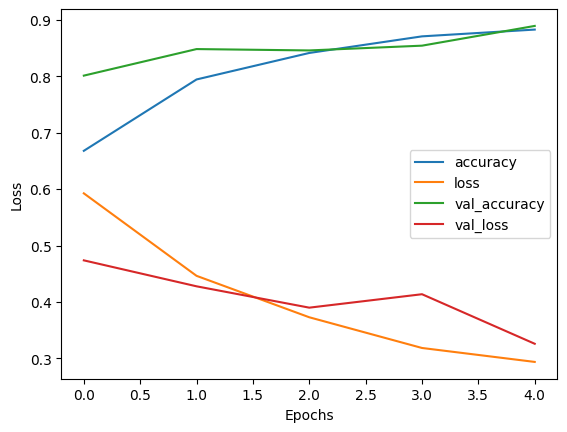

In [21]:
pd.DataFrame(model_1_loss.history).plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()